## <b> Bird Species Prediction </b>

In this project, a Convolutional Neural Network is used to predict the species of birds. The keras framework will be used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2 as cv
import random
import os
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

### Data Inspection & Exploration

We will plot random images from our dataset and observe their widths and heights

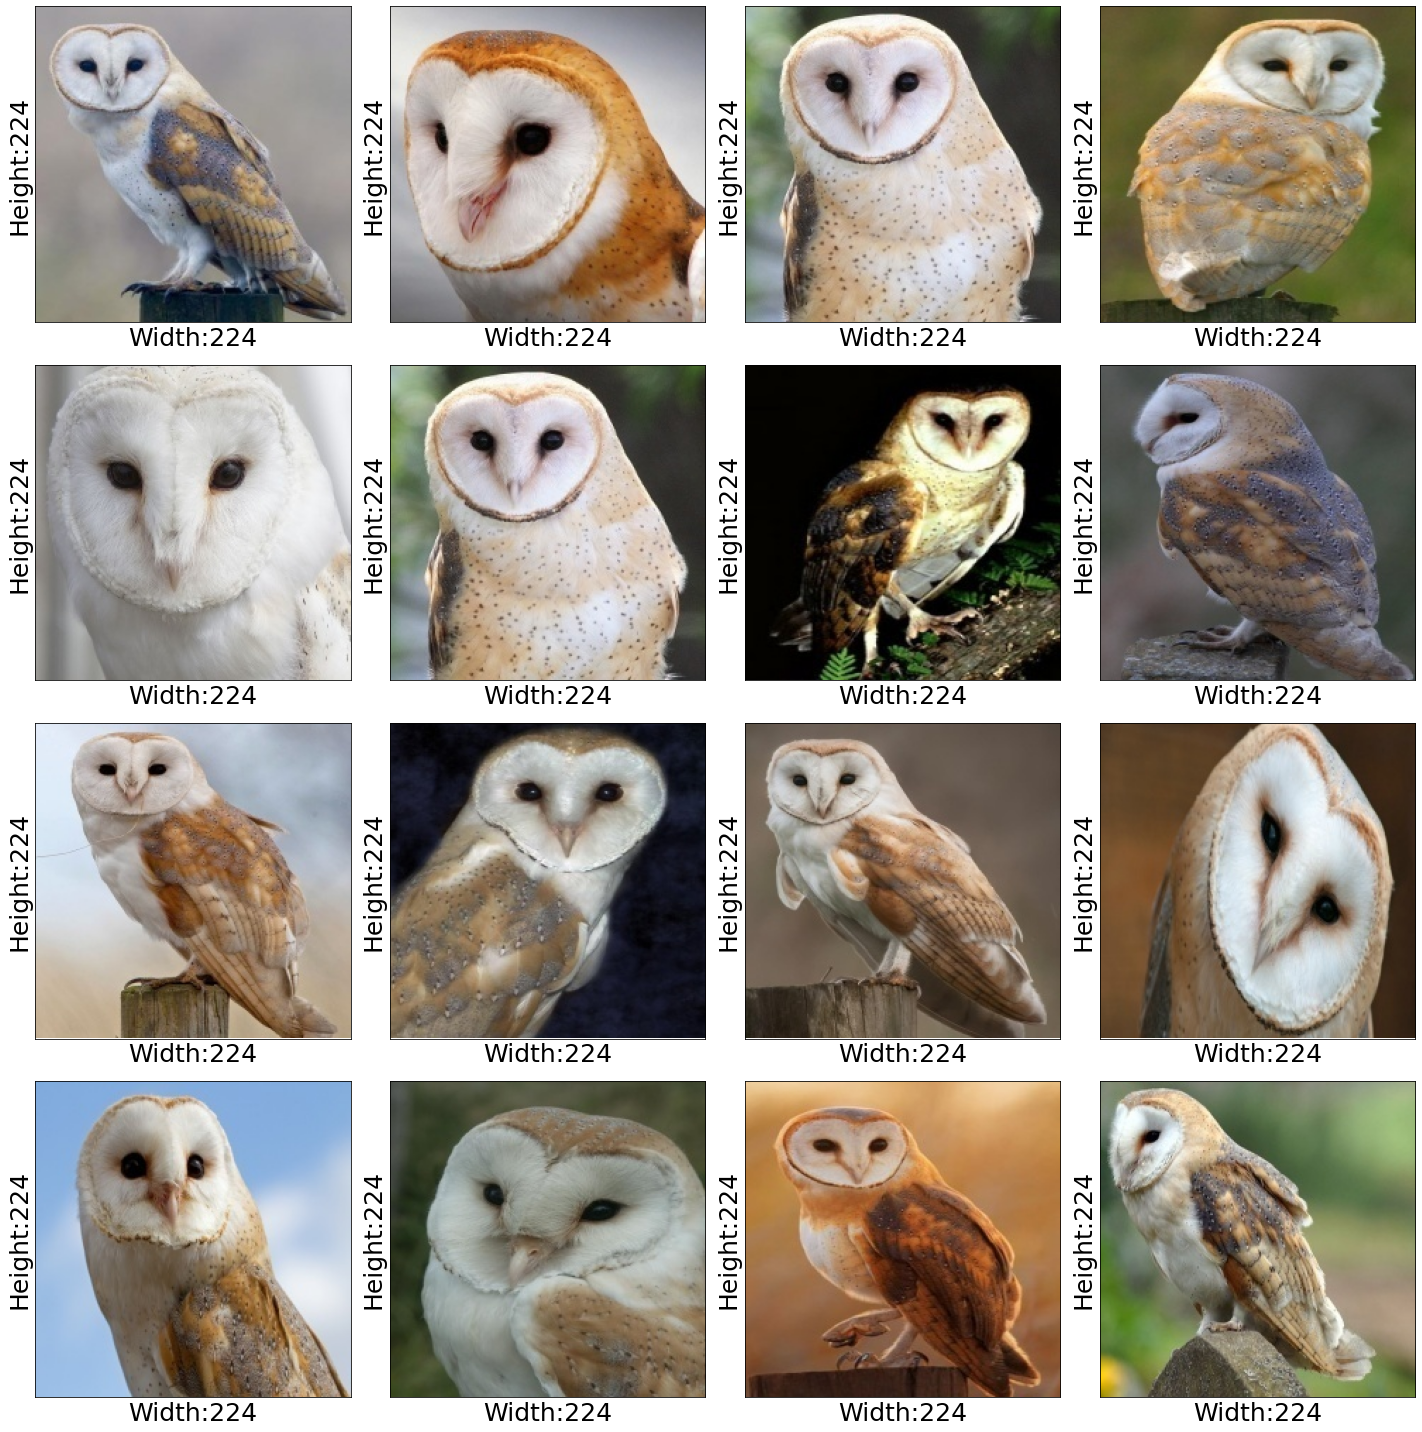

In [2]:
# Plotting 16 images from the dataset
plt.figure(figsize=(20,20))
path = 'Bird Speciees Dataset\BARN OWL'
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.xlabel("Width:" + str(rand_img.shape[1]), fontsize=25)
    plt.ylabel("Height:" + str(rand_img.shape[0]), fontsize=25)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(rand_img)

Load in the images and their labels into their respective labels

In [4]:
dir = 'Bird Speciees Dataset'
root_dir = os.listdir(dir)
image_list, label_list = [], []

for directory in root_dir:
    plant_image_list = os.listdir(f"{dir}/{directory}")
    for file in plant_image_list:
        image_path = f"{dir}/{directory}/{file}"
        image = cv.imread(image_path)
        image_list.append(img_to_array(image))
        label_list.append(directory)

Imbalance check on the Label list

<AxesSubplot:>

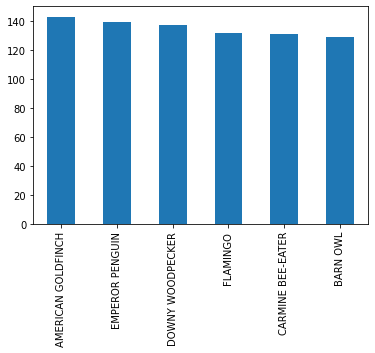

In [6]:
pd.DataFrame(label_list)[0].value_counts().plot.bar()

# The label imbalance in this dataset is not too much. We can proceed.
# The only problem is that we have too few samples per class. 

A few dimensionality checks

In [8]:
len(image_list), len(label_list), image_list[0].shape

(811, 811, (224, 224, 3))

In [9]:
image_list = np.array(image_list)
label_list = np.array(label_list)

Splitting the data into train & test sets, binarize the labels

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(image_list, label_list, test_size = 0.2, shuffle=True, random_state=42)
Xtrain = (np.array(Xtrain, dtype = np.float32)/255)
Xtrain = Xtrain.reshape(-1, 224, 224, 3)
Xtest = (np.array(Xtest, dtype = np.float32)/255)
Xtest = Xtest.reshape(-1, 224, 224, 3)

In [19]:
lb = LabelBinarizer()
lb.fit(ytrain)
ytrain_bin = lb.transform(ytrain)
ytest_bin = lb.transform(ytest)

### Building the Model

In [22]:
model = Sequential()
model.add(Conv2D(8, (3,3), padding='same', input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(label_list)), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [24]:
model.compile(
    optimizer = Adam(0.0005),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [25]:
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain_bin, test_size=0.2)

In [ ]:
epochs = 50
batch_size = 128
r = model.fit(Xtrain, ytrain, batch_size = batch_size, epochs = epochs, validation_data = (Xval, yval))

In [26]:
model.save('bird_species.h5')

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(r.history['accuracy'], color='r')
plt.plot(r.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

Evaluating the model's accuracy on the test data

In [ ]:
# Test accuracy
scores = model.evaluate(Xtest, ytest_bin)
print(f'Test Accuracy:{scores[1]*100}')

In [ ]:
# Further Predictions
each_label = np.unique(label_list)
y_pred = model.predict(Xtest)

In [ ]:
# Visual representation of prediction against true value
test_image = Xtest[5]
test_pred = each_label[np.argmax(y_pred[5])]
test_truth = ytest[5]
plt.imshow()
plt.title(f'The true label is {test_truth} \nThe prediction is {test_pred}')

### Scope

The scope of this project touches recreation, as visitors in bird sanctuaries and bird watchers can use this model to get the name of birds that they encounter